In [1]:
install.packages('caTools')
install.packages('GGally')
install.packages('ROCR')
install.packages('sjPlot')

also installing the dependency ‘bitops’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘reshape’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘gtools’, ‘gplots’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘estimability’, ‘mvtnorm’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘emmeans’, ‘lme4’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(ggplot2);
library(tidyverse);
library(caTools);
library(dplyr);
library(lubridate);
library(e1071);
library(GGally);
library(ROCR);
library(caret);

library(sjPlot);
#library(sjlabelled)
#library(sjmisc)

suppressMessages(library(pROC));

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [3]:
df <- read.csv('../Data/Full_train_test_split/df_full_end_test_classification.csv')
df <- df %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01"), hour = hour(chunk), weekday = weekdays(chunk))
df$weekday <- as.factor(df$weekday)
df$abnormal <- as.factor(df$abnormal)
head(df)

,X,chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,abnormal,daily_policy_index,⋯,X22_hr,X23_hr,X24_hr,X25_hr,X26_hr,X27_hr,X28_hr,train_test,hour,weekday
,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<fct>
1,29,2018-10-26 19:00:00,17,6.034263,21.52583,0,0.04321217,0.4171159,0,131.03,⋯,22,24,11,9,8,3,3,train,19,Friday
2,30,2018-10-26 20:00:00,15,5.561813,16.28374,0,0.04321217,-0.4045199,0,131.03,⋯,18,22,24,11,9,8,3,train,20,Friday
3,31,2018-10-26 21:00:00,15,5.399833,17.53819,0,0.04321217,-0.9145045,0,131.03,⋯,17,18,22,24,11,9,8,train,21,Friday
4,32,2018-10-26 22:00:00,19,4.787232,10.76873,0,0.04321217,-0.3375264,0,131.03,⋯,6,17,18,22,24,11,9,train,22,Friday
5,33,2018-10-26 23:00:00,21,4.534415,11.67290,0,0.04321217,1.0419964,0,131.03,⋯,7,6,17,18,22,24,11,train,23,Friday
6,34,2018-10-27 00:00:00,5,4.079211,14.18510,0,0.02031840,-0.8932260,0,112.53,⋯,5,7,6,17,18,22,24,train,0,Saturday


In [4]:
df_std_3_4_hr <- df %>% select(temp_weighted, cloud_cover_weighted, rainfall_weighted, abnormal,
                              polarity, X4_hr_std, X5_hr_std, X6_hr_std, X7_hr_std, X8_hr_std, X9_hr_std,
                               X10_hr_std, X11_hr_std, X12_hr_std, X13_hr_std, X14_hr_std, X15_hr_std, X16_hr_std,
                                X17_hr_std, X18_hr_std, X19_hr_std, X20_hr_std, X21_hr_std, X22_hr_std, X23_hr_std,
                                X24_hr_std, X25_hr_std, X26_hr_std, X27_hr_std, X28_hr_std,
                               train_test, hour, weekday, daily_policy_index)

In [5]:
df_std_3_4_hr_train <- df_std_3_4_hr[df_std_3_4_hr$train_test == 'train',] %>% select(-train_test)
df_std_3_4_hr_test <- df_std_3_4_hr[df_std_3_4_hr$train_test == 'test',] %>% select(-train_test)

In [6]:
str(df_std_3_4_hr_test)

'data.frame':	3765 obs. of  33 variables:
 $ temp_weighted       : num  12.4 12.4 12.5 12.7 12.7 ...
 $ cloud_cover_weighted: num  75.4 80.4 81.4 75.8 70.4 ...
 $ rainfall_weighted   : num  0.3704 0.5095 0.0398 0 0 ...
 $ abnormal            : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ polarity            : num  0.0421 0.0421 0.0421 0.0421 0.0421 ...
 $ X4_hr_std           : num  -0.2198 -1.6024 -0.6434 -1.1155 0.0603 ...
 $ X5_hr_std           : num  -0.69 -0.22 -1.602 -0.643 -1.115 ...
 $ X6_hr_std           : num  0.307 -0.69 -0.22 -1.602 -0.643 ...
 $ X7_hr_std           : num  1.458 0.307 -0.69 -0.22 -1.602 ...
 $ X8_hr_std           : num  1.523 1.458 0.307 -0.69 -0.22 ...
 $ X9_hr_std           : num  0.963 1.523 1.458 0.307 -0.69 ...
 $ X10_hr_std          : num  -0.443 0.963 1.523 1.458 0.307 ...
 $ X11_hr_std          : num  1.565 -0.443 0.963 1.523 1.458 ...
 $ X12_hr_std          : num  -0.221 1.565 -0.443 0.963 1.523 ...
 $ X13_hr_std          : num  -0.494 -0.

In [7]:
df_std_3_4_hr_train

,temp_weighted,cloud_cover_weighted,rainfall_weighted,abnormal,polarity,X4_hr_std,X5_hr_std,X6_hr_std,X7_hr_std,X8_hr_std,⋯,X22_hr_std,X23_hr_std,X24_hr_std,X25_hr_std,X26_hr_std,X27_hr_std,X28_hr_std,hour,weekday,daily_policy_index
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
1,6.034263,21.525829,0.000000000,0,0.04321217,-0.4374796,0.7108556,1.8196562,0.3108767,-0.6507914,⋯,0.1196872,0.7105955,-0.9455626,-0.9937495,-1.4766641,-2.2057631,-2.2057631,19,Friday,131.03
2,5.561813,16.283735,0.000000000,0,0.04321217,-0.0247520,-0.4374796,0.7108556,1.8196562,0.3108767,⋯,-0.5376402,0.1196872,0.7105955,-0.9455626,-0.9937495,-1.4766641,-1.4766641,20,Friday,131.03
3,5.399833,17.538188,0.000000000,0,0.04321217,-1.3726190,-0.0247520,-0.4374796,0.7108556,1.8196562,⋯,0.3432454,-0.5376402,0.1196872,0.7105955,-0.9455626,-0.9937495,-0.9937495,21,Friday,131.03
4,4.787232,10.768733,0.000000000,0,0.04321217,-0.6010679,-1.3726190,-0.0247520,-0.4374796,0.7108556,⋯,-0.5509926,0.3432454,-0.5376402,0.1196872,0.7105955,-0.9455626,-0.9455626,22,Friday,131.03
5,4.534415,11.672903,0.000000000,0,0.04321217,0.4171159,-0.6010679,-1.3726190,-0.0247520,-0.4374796,⋯,0.1497921,-0.5509926,0.3432454,-0.5376402,0.1196872,0.7105955,0.7105955,23,Friday,131.03
6,4.079211,14.185104,0.000000000,0,0.02031840,-0.4045199,0.4171159,-0.6010679,-1.3726190,-0.0247520,⋯,-0.0304761,0.1497921,-0.5509926,0.3432454,-0.5376402,0.1196872,0.1196872,0,Saturday,112.53
7,4.028406,24.473330,0.000000000,0,0.02031840,-0.9145045,-0.4045199,0.4171159,-0.6010679,-1.3726190,⋯,-0.6507914,-0.0304761,0.1497921,-0.5509926,0.3432454,-0.5376402,-0.5376402,1,Saturday,112.53
8,3.646402,21.989287,0.000000000,0,0.02031840,-0.3375264,-0.9145045,-0.4045199,0.4171159,-0.6010679,⋯,1.4907880,-0.6507914,-0.0304761,0.1497921,-0.5509926,0.3432454,0.3432454,2,Saturday,112.53
9,3.128456,14.128127,0.000000000,0,0.02031840,1.0419964,-0.3375264,-0.9145045,-0.4045199,0.4171159,⋯,-1.1927199,1.4907880,-0.6507914,-0.0304761,0.1497921,-0.5509926,-0.5509926,3,Saturday,112.53


In [8]:
Train_mask <- df_std_3_4_hr_train %>% select_if(is.numeric)
Train_means <- data.frame(as.list(Train_mask %>% apply(2, mean)))
Train_stddevs <- data.frame(as.list(Train_mask %>% apply(2, sd)))


col_names <- names(Train_mask)
for (i in 1:ncol(Train_mask)){
  df_std_3_4_hr_train[,col_names[i]] <- (df_std_3_4_hr_train[,col_names[i]] - Train_means[,col_names[i]])/Train_stddevs[,col_names[i]]
  df_std_3_4_hr_test[,col_names[i]] <-  (df_std_3_4_hr_test[,col_names[i]] - Train_means[,col_names[i]])/Train_stddevs[,col_names[i]]
}

In [9]:
f1_score <- function(predicted, expected, positive.class="1") {
    predicted <- factor(as.character(predicted), levels=unique(as.character(expected)))
    expected  <- as.factor(expected)
    cm = as.matrix(table(expected, predicted))

    precision <- diag(cm) / colSums(cm)
    recall <- diag(cm) / rowSums(cm)
    f1 <-  ifelse(precision + recall == 0, 0, 2 * precision * recall / (precision + recall))

    #Assuming that F1 is zero when it's not possible compute it
    f1[is.na(f1)] <- 0

    #Binary F1 or Multi-class macro-averaged F1
    ifelse(nlevels(expected) == 2, f1[positive.class], mean(f1))
}

In [58]:
m1= svm(formula = fml,
         data = df_std_3_4_hr_train,
        type = 'C-classification',
         kernel = 'linear', class.weights=c('0'=1, '1'=10), cost=c(0.001), probability = TRUE)

In [59]:
m2= svm(formula = fml,
         data = df_std_3_4_hr_train,
        type = 'C-classification',
         kernel = 'radial', class.weights=c('0'=1, '1'=10),gamma = 0.1, cost=1, probability = TRUE)

In [10]:
install.packages('doParallel')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
pkgs <- c('foreach', 'doParallel')
lapply(pkgs, require, character.only = T)
registerDoParallel(8)

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



[[1]]
[1] TRUE

[[2]]
[1] TRUE

In [23]:
df_std_3_4_hr_train$fold <- caret::createFolds(1:nrow(df_std_3_4_hr_train), k = 5, list = FALSE)
x <- paste("temp_weighted + cloud_cover_weighted + rainfall_weighted +
                              polarity + X4_hr_std + X5_hr_std + X6_hr_std + X7_hr_std + X8_hr_std + X9_hr_std +
                               X10_hr_std + X11_hr_std + X12_hr_std + X13_hr_std + X14_hr_std + X15_hr_std + X16_hr_std +
                                X17_hr_std + X18_hr_std + X19_hr_std + X20_hr_std + X21_hr_std + X22_hr_std + X23_hr_std +
                                X24_hr_std + X25_hr_std + X26_hr_std + X27_hr_std + X28_hr_std +
                                hour + weekday + daily_policy_index") 
fml <- as.formula(paste("as.factor(abnormal) ~ ", x))
### PARAMETER LIST ###
cost <- c(0.001, 0.01, 0.1, 1)
weights <- c(1,2,4,7,10,20)
gamma <- c(0.1,0.5,1,2,3,4)
parms <- expand.grid(cost = cost, weights = weights)
### LOOP THROUGH PARAMETER VALUES ###
result <- foreach(i = 1:nrow(parms), .combine = rbind) %do% {
  c <- parms[i, ]$cost
  w <- parms[i, ]$weights
  ### K-FOLD VALIDATION ###
  out <- foreach(j = 1:max(df_std_3_4_hr_train$fold), .combine = rbind, .inorder = FALSE) %dopar% {
    deve <- df_std_3_4_hr_train[df_std_3_4_hr_train$fold != j, ]
    test <- df_std_3_4_hr_train[df_std_3_4_hr_train$fold == j, ]
    mdl <- svm(fml, data = deve, type = "C-classification", kernel = "linear", cost = c, class.weights=c('0'=1, '1'=w), probability = TRUE)
    pred <- predict(mdl, test, decision.values = TRUE, probability = TRUE)
    data.frame(y = test$abnormal, pred = pred)
  }
  ### CALCULATE SVM PERFORMANCE ###
  f1 <- f1_score(as.factor(out$y), as.factor(out$pred)) 
  data.frame(parms[i, ], f1 = f1)
}

In [10]:
df_std_3_4_hr_train$fold <- caret::createFolds(1:nrow(df_std_3_4_hr_train), k = 5, list = FALSE)
x <- paste("temp_weighted + cloud_cover_weighted + rainfall_weighted +
                              polarity + X4_hr_std + X5_hr_std + X6_hr_std + X7_hr_std + X8_hr_std + X9_hr_std +
                               X10_hr_std + X11_hr_std + X12_hr_std + X13_hr_std + X14_hr_std + X15_hr_std + X16_hr_std +
                                X17_hr_std + X18_hr_std + X19_hr_std + X20_hr_std + X21_hr_std + X22_hr_std + X23_hr_std +
                                X24_hr_std + X25_hr_std + X26_hr_std + X27_hr_std + X28_hr_std +
                                hour + weekday + daily_policy_index") 
fml <- as.formula(paste("as.factor(abnormal) ~ ", x))

In [12]:
cost <- c(0.001, 0.01, 0.1, 1)
weights <- c(1,2,4,7,10,20)
gamma <- c(0.1,0.5,1,2,3,4)

In [24]:
result

,cost,weights,f1
,<dbl>,<dbl>,<dbl>
1,0.001,1,0.00000000
2,0.010,1,0.00000000
3,0.100,1,0.00000000
4,1.000,1,0.00000000
5,0.001,2,0.03030303
6,0.010,2,0.00000000
7,0.100,2,0.00000000
8,1.000,2,0.00000000
9,0.001,4,0.17647059


In [ ]:
t1 = tune.svm(abnormal~., data=df_std_3_4_hr_train, kernel="linear",type = 'C-classification', cost=c(0.001, 0.01, 0.1, 1,5,10, 100,1000), class.weights=list(c('0'=1, '1'=10), c('0'=1, '1'=4), c('0'=1, '1'=7)),
                                                                                                                                                    probability = TRUE)

In [ ]:
t1$best.model;t1$best.parameters;

In [11]:
m1_= svm(fml, data = df_std_3_4_hr_train, type = 'C-classification', kernel = 'linear', cost=0.001, class.weights=c('0'=1, '1'=7),
         probability = TRUE)

In [14]:
### LOOP THROUGH PARAMETER VALUES ###
parms <- expand.grid(cost = cost, gamma = gamma)
result_radial <- foreach(i = 1:nrow(parms), .combine = rbind) %do% {
  c <- parms[i, ]$cost
  g <- parms[i, ]$gamma
  ### K-FOLD VALIDATION ###
  out <- foreach(j = 1:max(df_std_3_4_hr_train$fold), .combine = rbind, .inorder = FALSE) %dopar% {
    deve <- df_std_3_4_hr_train[df_std_3_4_hr_train$fold != j, ]
    test <- df_std_3_4_hr_train[df_std_3_4_hr_train$fold == j, ]
    mdl <- svm(fml, data = deve, type = "C-classification", kernel = "radial", cost = c, gamma = g, class.weights=c('0'=1, '1'=7), probability = TRUE)
    pred <- predict(mdl, test, type='class')
    data.frame(y = test$abnormal, pred = pred)
  }
  ### CALCULATE SVM PERFORMANCE ###
  f1 <- f1_score(as.factor(out$y), as.factor(out$pred))
  data.frame(parms[i, ], f1 = f1)
}

In [15]:
result_radial

,cost,gamma,f1
,<dbl>,<dbl>,<dbl>
1,0.001,0.1,0.000000000
2,0.010,0.1,0.000000000
3,0.100,0.1,0.218543046
4,1.000,0.1,0.301886792
5,0.001,0.5,0.000000000
6,0.010,0.5,0.000000000
7,0.100,0.5,0.059040590
8,1.000,0.5,0.093862816
9,0.001,1.0,0.000000000


In [10]:
t2 = tune.svm(abnormal~., data=df_std_3_4_hr_train, kernel="radial", gamma=c(0.1,0.5,1,2,3,4),  cost=c(0.001, 0.01, 0.1, 1,5,10, 100,1000), class.weights=list(c('0'=1, '1'=10), c('0'=1, '1'=4), c('0'=1, '1'=7)),  probability = TRUE)

In [ ]:
t2$best.model;t2$best.parameters;

In [46]:
m2_= svm(fml, data = df_std_3_4_hr_train, type = 'C-classification',
         kernel = 'radial', gamma=0.1, cost=1, probability = TRUE)

# Predict

In [60]:
## compare all classification models basic version

y_pred_hard_m1 = predict(m1, newdata = df_std_3_4_hr_test[,-4], type = 'class');
y_pred_hard_m2 = predict(m2, newdata = df_std_3_4_hr_test[,-4], type = 'class');
y_pred_hard_m3 = predict(m1_, newdata = df_std_3_4_hr_test[,-4], type = 'class');
y_pred_hard_m4 = predict(m2_, newdata = df_std_3_4_hr_test[,-4], type = 'class');

y_pred_prob_m1 = attr(predict(m1, newdata = df_std_3_4_hr_test[,-4], probability=T), "probabilities")[,"1"]
y_pred_prob_m2 = attr(predict(m2, newdata = df_std_3_4_hr_test[,-4], probability=T), "probabilities")[,"1"]
y_pred_prob_m3 = attr(predict(m1_, newdata = df_std_3_4_hr_test[,-4], probability=T), "probabilities")[,"1"]
y_pred_prob_m4 = attr(predict(m2_, newdata = df_std_3_4_hr_test[,-4], probability=T), "probabilities")[,"1"]

In [61]:
######   Make the Confusion Matrix   

cmt1 = as.matrix(table(df_std_3_4_hr_test$abnormal, y_pred_hard_m1))
cmt1
cmt2 = as.matrix(table(df_std_3_4_hr_test$abnormal, y_pred_hard_m2))
cmt2
cmt3 = as.matrix(table(df_std_3_4_hr_test$abnormal, y_pred_hard_m3))
cmt3
cmt4 = as.matrix(table(df_std_3_4_hr_test$abnormal, y_pred_hard_m4))
cmt4

   y_pred_hard_m1
       0    1
  0 3662   54
  1   21   28

   y_pred_hard_m2
       0    1
  0 3713    3
  1   48    1

   y_pred_hard_m3
       0    1
  0 3676   40
  1   23   26

   y_pred_hard_m4
       0    1
  0 3716    0
  1   49    0

In [62]:
cm1 = confusionMatrix(as.factor(df_std_3_4_hr_test$abnormal), y_pred_hard_m1);
cm2 = confusionMatrix(as.factor(df_std_3_4_hr_test$abnormal), y_pred_hard_m2);
cm3 = confusionMatrix(as.factor(df_std_3_4_hr_test$abnormal), y_pred_hard_m3);
cm4 = confusionMatrix(as.factor(df_std_3_4_hr_test$abnormal), y_pred_hard_m4);

In [63]:
cm1
cm2
cm3
cm4

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3662   54
         1   21   28
                                          
               Accuracy : 0.9801          
                 95% CI : (0.9751, 0.9843)
    No Information Rate : 0.9782          
    P-Value [Acc > NIR] : 0.2365730       
                                          
                  Kappa : 0.418           
                                          
 Mcnemar's Test P-Value : 0.0002199       
                                          
            Sensitivity : 0.9943          
            Specificity : 0.3415          
         Pos Pred Value : 0.9855          
         Neg Pred Value : 0.5714          
             Prevalence : 0.9782          
         Detection Rate : 0.9726          
   Detection Prevalence : 0.9870          
      Balanced Accuracy : 0.6679          
                                          
       'Positive' Class : 0               
                        

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3713    3
         1   48    1
                                          
               Accuracy : 0.9865          
                 95% CI : (0.9822, 0.9899)
    No Information Rate : 0.9989          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0358          
                                          
 Mcnemar's Test P-Value : 7.218e-10       
                                          
            Sensitivity : 0.98724         
            Specificity : 0.25000         
         Pos Pred Value : 0.99919         
         Neg Pred Value : 0.02041         
             Prevalence : 0.99894         
         Detection Rate : 0.98619         
   Detection Prevalence : 0.98699         
      Balanced Accuracy : 0.61862         
                                          
       'Positive' Class : 0               
                        

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3676   40
         1   23   26
                                          
               Accuracy : 0.9833          
                 95% CI : (0.9786, 0.9871)
    No Information Rate : 0.9825          
    P-Value [Acc > NIR] : 0.38504         
                                          
                  Kappa : 0.4439          
                                          
 Mcnemar's Test P-Value : 0.04382         
                                          
            Sensitivity : 0.9938          
            Specificity : 0.3939          
         Pos Pred Value : 0.9892          
         Neg Pred Value : 0.5306          
             Prevalence : 0.9825          
         Detection Rate : 0.9764          
   Detection Prevalence : 0.9870          
      Balanced Accuracy : 0.6939          
                                          
       'Positive' Class : 0               
                        

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3716    0
         1   49    0
                                          
               Accuracy : 0.987           
                 95% CI : (0.9828, 0.9904)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 7.025e-12       
                                          
            Sensitivity : 0.987           
            Specificity :    NA           
         Pos Pred Value :    NA           
         Neg Pred Value :    NA           
             Prevalence : 1.000           
         Detection Rate : 0.987           
   Detection Prevalence : 0.987           
      Balanced Accuracy :    NA           
                                          
       'Positive' Class : 0               
                        

In [64]:
### Print accuracy, sensitivity and specificity of the model

cat("#------------------------------------------------#\n")
cat("####    accuracy, sensitivity , specificity   ####\n")
cat("#------------------------------------------------#\n")
cat("\nModel 1 accuracy = ", round(cm1$overall["Accuracy"],4), "Sensitivity =",  round(cm1$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm1$byClass["Specificity"], 4), "error rate = ",1 - round(cm1$overall["Accuracy"],4));
cat("\nModel 2 accuracy = ", round(cm2$overall["Accuracy"],4), "Sensitivity =",  round(cm2$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm2$byClass["Specificity"], 4), "error rate = ",1 - round(cm2$overall["Accuracy"],4));
cat("\nModel 3 accuracy = ", round(cm3$overall["Accuracy"],4), "Sensitivity =",  round(cm3$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm3$byClass["Specificity"], 4), "error rate = ",1 - round(cm3$overall["Accuracy"],4));
cat("\nModel 3 accuracy = ", round(cm4$overall["Accuracy"],4), "Sensitivity =",  round(cm4$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm4$byClass["Specificity"], 4), "error rate = ",1 - round(cm4$overall["Accuracy"],4));



#------------------------------------------------#
####    accuracy, sensitivity , specificity   ####
#------------------------------------------------#

Model 1 accuracy =  0.9801 Sensitivity = 0.9943 Specificity =  0.3415 error rate =  0.0199
Model 2 accuracy =  0.9865 Sensitivity = 0.9872 Specificity =  0.25 error rate =  0.0135
Model 3 accuracy =  0.9833 Sensitivity = 0.9938 Specificity =  0.3939 error rate =  0.0167
Model 3 accuracy =  0.987 Sensitivity = 0.987 Specificity =  NA error rate =  0.013

In [65]:
roc1 = roc(df_std_3_4_hr_test$abnormal , y_pred_prob_m1, quiet=TRUE);
roc2 = roc(df_std_3_4_hr_test$abnormal , y_pred_prob_m2, quiet=TRUE);
roc3 = roc(df_std_3_4_hr_test$abnormal , y_pred_prob_m3, quiet=TRUE);
roc4 = roc(df_std_3_4_hr_test$abnormal , y_pred_prob_m4, quiet=TRUE);



cat("Model 1 area under the curve = ", roc1[["auc"]],"\n");
cat("Model 2 area under the curve = ", roc2[["auc"]],"\n");
cat("Model 3 area under the curve = ", roc3[["auc"]],"\n");
cat("Model 4 area under the curve = ", roc4[["auc"]],"\n");



Model 1 area under the curve =  0.9514675 
Model 2 area under the curve =  0.884416 
Model 3 area under the curve =  0.9525164 
Model 4 area under the curve =  0.8773643 


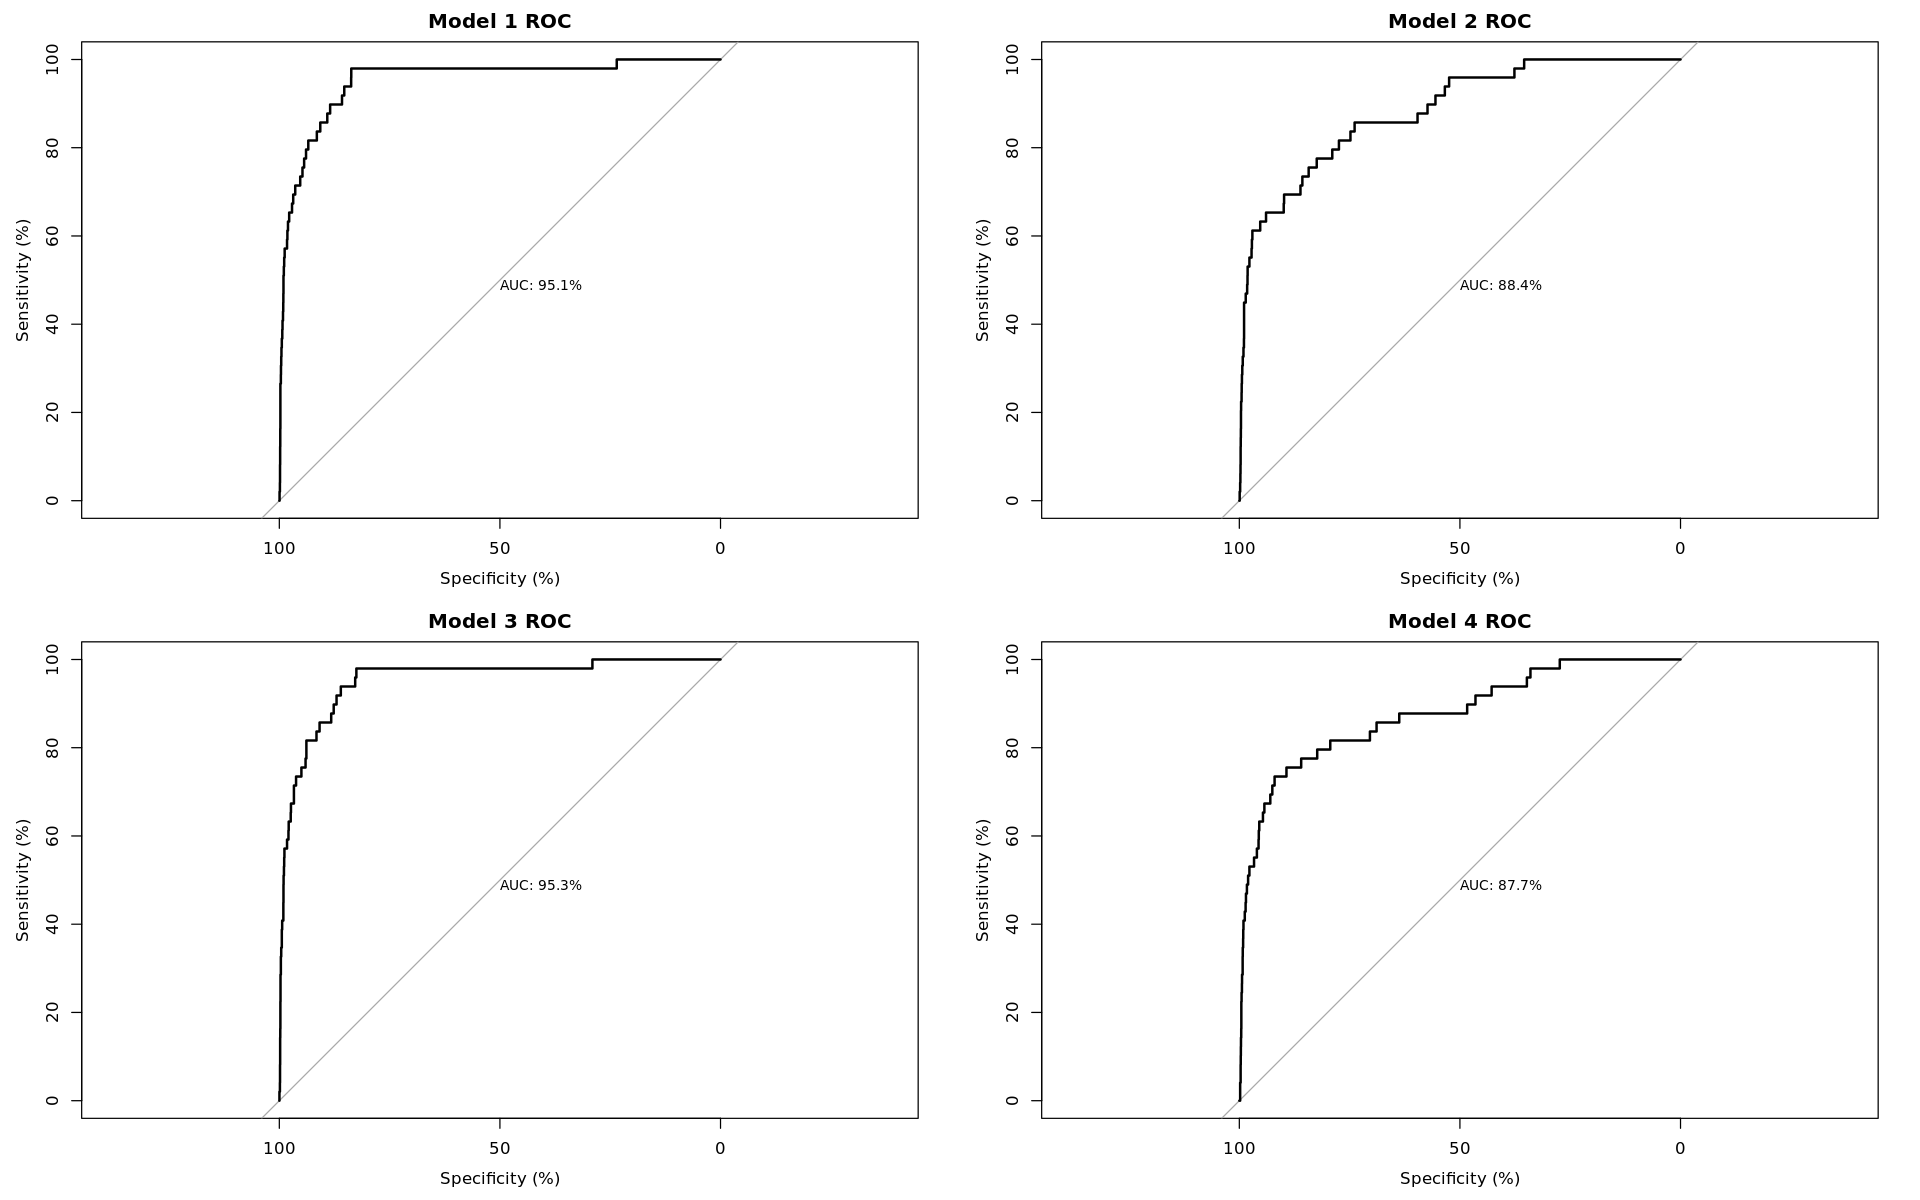

In [66]:
## Plot the ROC curve

par(mfrow = c(2,2))
options(repr.plot.width=16, repr.plot.height=10)
a = roc(df_std_3_4_hr_test$abnormal, y_pred_prob_m1, plot = TRUE,
        print.auc = TRUE, percent=TRUE, main = "Model 1 ROC", quiet=TRUE);
b = roc(df_std_3_4_hr_test$abnormal, y_pred_prob_m2, plot = TRUE,
        print.auc = TRUE, percent=TRUE, main = "Model 2 ROC", quiet=TRUE);
c = roc(df_std_3_4_hr_test$abnormal, y_pred_prob_m3, plot = TRUE,
        print.auc = TRUE, percent=TRUE, main = "Model 3 ROC", quiet=TRUE);
d = roc(df_std_3_4_hr_test$abnormal, y_pred_prob_m4, plot = TRUE,
        print.auc = TRUE, percent=TRUE, main = "Model 4 ROC", quiet=TRUE);


In [67]:
 n = sum(cmt1) # number of instances
 nc = nrow(cmt1) # number of classes
 diag = diag(cmt1) # number of correctly classified instances per class 
 rowsums = apply(cmt1, 1, sum) # number of instances per class
 colsums = apply(cmt1, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

accuracy = sum(diag) / n  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9800797,0.9942981,0.9854682,0.9898635
1,0.9800797,0.3414634,0.5714286,0.4274809


In [68]:
 n = sum(cmt2) # number of instances
 nc = nrow(cmt2) # number of classes
 diag = diag(cmt2) # number of correctly classified instances per class 
 rowsums = apply(cmt2, 1, sum) # number of instances per class
 colsums = apply(cmt2, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

accuracy = sum(diag) / n  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9864542,0.9872374,0.99919268,0.99317908
1,0.9864542,0.2500000,0.02040816,0.03773585


In [69]:
 n = sum(cmt3) # number of instances
 nc = nrow(cmt3) # number of classes
 diag = diag(cmt3) # number of correctly classified instances per class 
 rowsums = apply(cmt3, 1, sum) # number of instances per class
 colsums = apply(cmt3, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

accuracy = sum(diag) / n  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9832669,0.9937821,0.9892357,0.9915037
1,0.9832669,0.3939394,0.5306122,0.4521739


In [70]:
 n = sum(cmt4) # number of instances
 nc = nrow(cmt4) # number of classes
 diag = diag(cmt4) # number of correctly classified instances per class 
 rowsums = apply(cmt4, 1, sum) # number of instances per class
 colsums = apply(cmt4, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

accuracy = sum(diag) / n  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9869854,0.9869854,1,0.9934501
1,0.9869854,NaN,0,NaN


In [12]:
y_pred_hard_m3 = predict(m1_, newdata = df_std_3_4_hr_test[,-4], type = 'class');

In [13]:
(y_pred_hard_m3)

27894 27895 27896 27897 27898 27899 27900 27901 27902 27903 27904 27905 27906 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27907 27908 27909 27910 27911 27912 27913 27914 27915 27916 27917 27918 27919 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27920 27921 27922 27923 27924 27925 27926 27927 27928 27929 27930 27931 27932 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27933 27934 27935 27936 27937 27938 27939 27940 27941 27942 27943 27944 27945 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27946 27947 27948 27949 27950 27951 27952 27953 27954 27955 27956 27957 27958 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27959 27960 27961 27962 27963 27964 27965 27966 27967 27968 27969 27970 27971 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27972 27973 27974 27975 27976 27977 27978 27979 27980 27981 27982 27983 27984 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27985 27986 27987 27988 27989 27990 27991 27992 27993 27994 27995 27996 27997 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
27998 27999 28000 28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28011 28012 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28024 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28050 28051 28052 28053 28054 28055 28056 28057 28058 28059 28060 28061 28062 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28063 28064 28065 28066 28067 28068 28069 28070 28071 28072 28073 28074 28075 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28076 28077 28078 28079 28080 28081 28082 28083 28084 28085 28086 28087 28088 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28089 28090 28091 28092 28093 28094 28095 28096 28097 28098 28099 28100 28101 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28102 28103 28104 28105 28106 28107 28108 28109 28110 28111 28112 28113 28114 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28115 28116 28117 28118 28119 28120 28121 28122 28123 28124 28125 28126 28127 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28128 28129 28130 28131 28132 28133 28134 28135 28136 28137 28138 28139 28140 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28141 28142 28143 28144 28145 28146 28147 28148 28149 28150 28151 28152 28153 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28154 28155 28156 28157 28158 28159 28160 28161 28162 28163 28164 28165 28166 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28167 28168 28169 28170 28171 28172 28173 28174 28175 28176 28177 28178 28179 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28180 28181 28182 28183 28184 28185 28186 28187 28188 28189 28190 28191 28192 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28193 28194 28195 28196 28197 28198 28199 28200 28201 28202 28203 28204 28205 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28206 28207 28208 28209 28210 28211 28212 28213 28214 28215 28216 28217 28218 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
28219 28220 28221 28222 28223 28224 28225 28226 28

In [17]:
cmt3 = as.matrix(table(df_std_3_4_hr_test$abnormal, y_pred_hard_m3))
cmt3

   y_pred_hard_m3
       0    1
  0 3676   40
  1   23   26

In [26]:
df_preds <- data.frame(ID = 27894:31658, SVM_preds = y_pred_hard_m3) %>% select(SVM_preds)
write.csv(df_preds, '../Data/SVM_preds.csv')


In [25]:
df_preds

,ID,SVM_preds
,<int>,<fct>
27894,27894,0
27895,27895,0
27896,27896,0
27897,27897,0
27898,27898,0
27899,27899,0
27900,27900,0
27901,27901,0
27902,27902,0
